In [2]:
# Settings and packages
%matplotlib inline

import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

plt.rc('font', family='Lato')

In [2]:
# College data from API and store in database
#api_results = bea_api_gdpstate(bea_key)

#bea_to_db(api_results)

In [24]:
# Retrieve data
df = growth_rate(gdpstate_df(retrieve_table('RGDP_SQN')['Data'])).iloc[-12:]

cmap = plt.cm.Spectral
norm = Normalize(vmin=-8, vmax=8)

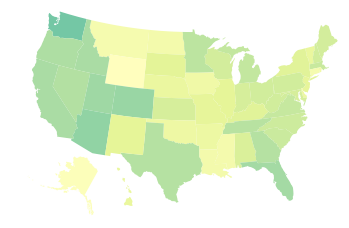

In [25]:
# Map settings
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw map
m.drawmapboundary()
m.readshapefile('shapefiles/states', 'states', drawbounds=False)
ax = plt.gca()
ax.axis('off')

for info, shape in zip(m.states_info, m.states):
    fc = cmap(norm(df[info['STATE_NAME']].mean()))
    if info['STATE_NAME'] == 'Hawaii':
        shape = [(i[0] + 5200000, i[1] - 1400000) for i in shape]
    elif info['STATE_NAME'] == 'Alaska':
        shape = [(i[0]*0.35 + 1100000, i[1]*0.35 - 1300000) for i in shape]
    ax.add_patch(Polygon(shape, fc=fc))